In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from IPython.display import Markdown
import math

# 1. Function definition
The set of function that will be optimized in first place are:
$$
\begin{array}\\
    f_1 (x,y) = 4x^2+4y^2\\
    f_2 (x,y) = (x-5)^2+(y-5)^2
\end{array}
$$
subjected to the next set of constraints:
$$
\begin{array}\\
    g_1(x,y)=(x-5)^2+y^2\leq25 \\
    g_2(x,y)=(x-8)^2+(y+3)^2\geq7.7
\end{array}
$$
in the domain limited by
$$
\begin{array}\\
    0 \leq x \leq 5 \\
    0 \leq y \leq 3
\end{array}
$$

This function is known as the [Binh and Korn function](https://en.wikipedia.org/wiki/Test_functions_for_optimization#Test_functions_for_multi-objective_optimization)

In [2]:
# true Pareto front obtained from MOEA framework 
TPF = np.genfromtxt('./Pareto_fronts/Binh2.pf')

In [3]:
# define two vectors within the search domain
x = np.linspace(0,5,200)
y = np.linspace(0,3,200)

# create the horizontal meshgrid with the points
X, Y = np.meshgrid(x,y)

# two variable functions
F1 = 4*X**2+4*Y**2
F2 = (X-5)**2+(Y-5)**2

# constraints
G1 = (X-5)**2+Y**2
G1 = G1 < 25.0001
G2 = (X-8)**2+(Y+3)**2
G2 = G2 > 7.699999
# the search space is constrained with the 
G = np.logical_and(G1, G2)

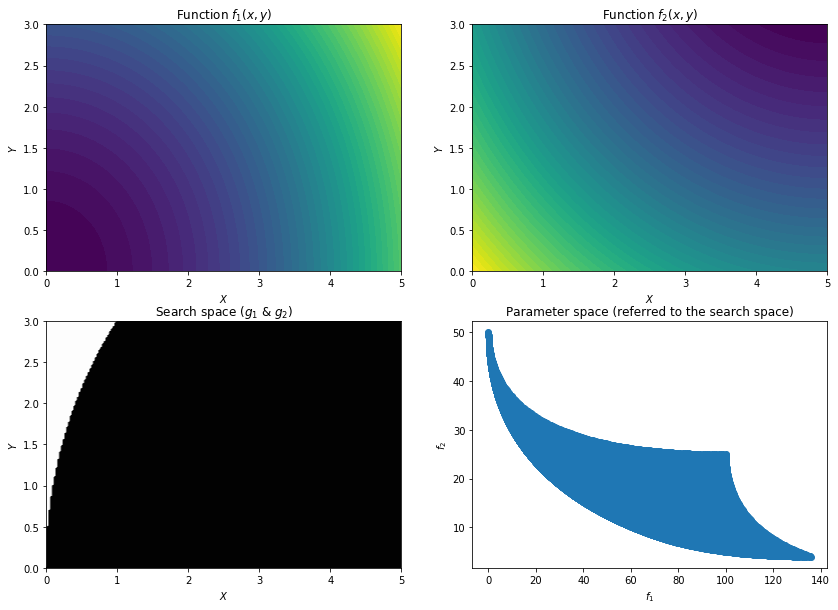

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14,10))

# function 1
ax1.contourf(X,Y,F1,50)
ax1.set_xlim([0,5])
ax1.set_ylim([0,3])
ax1.set_xlabel(r'$X$')
ax1.set_ylabel(r'$Y$')
ax1.set_title(r'Function $f_1(x,y)$')

# function 2
ax2.contourf(X,Y,F2,50)
ax2.set_xlim([0,5])
ax2.set_ylim([0,3])
ax2.set_xlabel(r'$X$')
ax2.set_ylabel(r'$Y$')
ax2.set_title(r'Function $f_2(x,y)$')

# search space
ax3.contourf(X,Y,G,50, cmap=cm.binary)
ax3.set_xlim([0,5])
ax3.set_ylim([0,3])
ax3.set_xlabel(r'$X$')
ax3.set_ylabel(r'$Y$')
ax3.set_title(r'Search space ($g_1$ & $g_2$)')

# parmeter space
ax4.scatter(F1[G],F2[G])
ax4.set_xlabel(r'$f_1$')
ax4.set_ylabel(r'$f_2$')
ax4.set_title(r'Parameter space (referred to the search space)');

## 1.1 Optimization functions
The optimization functions are usually defined to minimize. All the optimization functions will be included in the same function, allowing the user to select (beginning with 0) the function from which the results is wanted at each moment.

In [5]:
# define the number of functions
funNo = 2

In [6]:
def fun(x,y,no):
    # include the functions here
    
    # attribute of the function to know the real number of callings to the function
    fun.counter += x.shape[0]/funNo
    
    # first function
    if no == 0:
        return 4*x**2+4*y**2
    # second function
    if no == 1:
        return (x-5)**2+(y-5)**2

## 1.2 Constraints
These will be defined as just one matrix, inside a function as before. 

In [7]:
def const(x,y,no):
    # use as the function 'fun'
    
    # first constraint
    if no == 0:
        return (x-5)**2+y**2
    # second constraint
    if no == 1:
        return (x-8)**2+(y+3)**2

## 1.3 Comparison mode and values

In [8]:
# value of the inequality for the constraints
constVal = [25, 7.7]

# modes of comparison for each constraint: 
#    less
#    greater
#    eq(ual)
#    l(ess or )eq(ual)
#    g(reater or )eq(ual)
compMode = ['leq', 'geq']

## 1.4 Domain limits

In [9]:
# set thre range of the search space as upper and lower bounds for x and y
x_low = 0
x_high = 5
y_low = 0
y_high = 3

# 2. Monte Carlo approach (= random search) for multiobjective optimization

In [10]:
# number of used points
noPoints = 250

# get a random set of points inside bounds
x = x_low+np.random.rand(noPoints)*(x_high-x_low)
y = y_low+np.random.rand(noPoints)*(y_high-y_low)

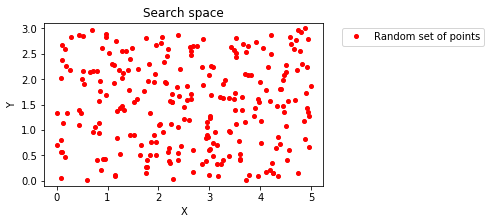

In [11]:
# plot the randomly generated set of points
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'r.',markersize = 8, label='Random set of points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Search space')
ax1.legend(bbox_to_anchor=(1.05,1.0))
ax1.axis('equal');

In [12]:
# make a copy of the points X-Y to apply the constraints
valid_x = np.copy(x)
valid_y = np.copy(y)

# get the valid points (those which fulfill the constraints)
for i in range(len(constVal)):
    if compMode[i] == 'leq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) < constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'less':
        boolMat = const(valid_x, valid_y, i) < constVal[i]
    elif compMode[i] == 'geq':
        boolMat = np.logical_or(const(valid_x, valid_y, i) > constVal[i], const(valid_x, valid_y, i) == constVal[i])
    elif compMode[i] == 'greater':
        boolMat = const(valid_x, valid_y, i) > constVal[i]
    elif compMode[i] == 'eq':
        boolMat = const(valid_x, valid_y, i) == constVal[i]
    else:
        print('Bad comparison mode matrix')
    valid_x = valid_x[boolMat] 
    valid_y = valid_y[boolMat]
    
# compare the size of the valid points
if len(valid_x) != len(valid_y):
    raise ValueError("Error in dimensions")

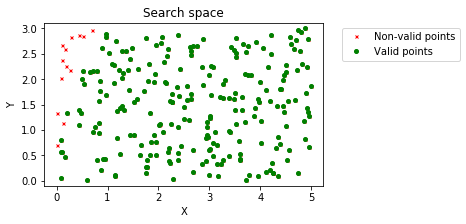

In [13]:
# plot the valid and non-valid points
fig, ax1 = plt.subplots(1, figsize=(x_high-x_low, y_high-y_low))
ax1.plot(x,y,'rx',markersize = 3, label='Non-valid points')
ax1.plot(valid_x,valid_y,'g.', markersize=8, label='Valid points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Search space')
ax1.legend(bbox_to_anchor=(1.05,1.0))
ax1.axis('equal');

In [14]:
# evaluate the functions for all points and for the valid ones
valid_values = np.zeros([len(valid_x), funNo])
all_values = np.zeros([len(x), funNo])

# function attribute counter
fun.counter = 0

# evaluate all functions for valid points
for i in range(funNo):
    valid_values[:,i] = fun(valid_x, valid_y, i)

# number of calllings to the function
MC_eval = fun.counter

# evaluate all functions for all points (plotting purposes)
for i in range(funNo):
    all_values[:,i] = fun(x, y, i)

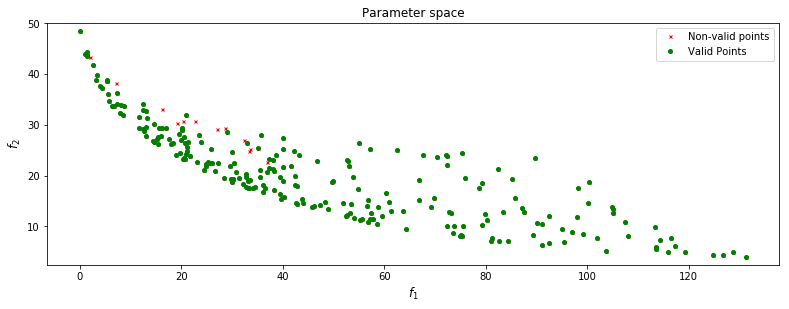

In [15]:
# plot the value of all points, remarking those which are valid
fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(all_values[:,0], all_values[:,1],'rx',markersize = 3, label='Non-valid points')
ax1.plot(valid_values[:,0], valid_values[:,1],'g.', markersize=8, label='Valid Points')
ax1.set_xlabel('$f_1$', fontsize=12)
ax1.set_ylabel('$f_2$', fontsize=12)
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
ax1.set_title('Parameter space')
ax1.legend()
ax1.axis('equal');

Once the values have been computed, the Skyline operator will be applied. In order to get the values that are not dominated by any of the other possible values, each point will divide the domain in 4 parts. If there is a point with a smaller X and Y (i.e. a more minimum value for both functions), the first point will be dominated and therefore it should not be in the Pareto front. A visual explanation is shown in the next cell before moving on to the function definition and usage for this set of points.

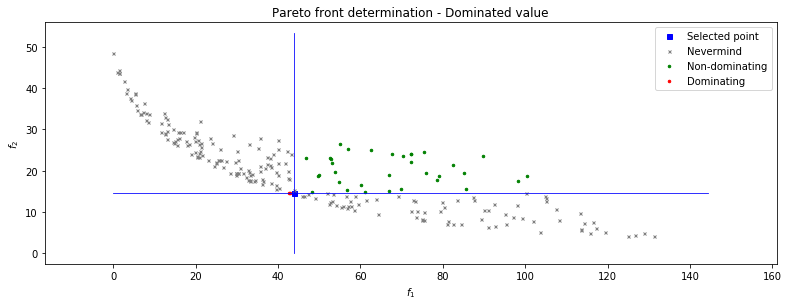

In [16]:
# pick a random point 
pt = valid_values[np.random.randint(0,len(valid_values)),:]

# creation of the 4 cuadrants arrays surrounding the point
#      u(pper) l(eft)
ul = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]>pt[1])] 
#      u(pper) r(ight)
ur = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]>pt[1])] 
#      l(ower) l(eft)
ll = valid_values[np.logical_and(valid_values[:,0]<pt[0],valid_values[:,1]<pt[1])] 
#      l(ower) r(ight)
lr = valid_values[np.logical_and(valid_values[:,0]>pt[0],valid_values[:,1]<pt[1])] 

# plot the selected point and the four quadrants
fig, ax1 = plt.subplots(1, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))
ax1.plot(pt[0], pt[1],'bs', markersize=5, label='Selected point')
ax1.plot(ul[:,0], ul[:,1],'x',c='gray', markersize=3, label='Nevermind')
ax1.plot(ur[:,0], ur[:,1],'g.', markersize=5, label='Non-dominating')
ax1.plot(ll[:,0], ll[:,1],'r.', markersize=5, label='Dominating')
ax1.plot(lr[:,0], lr[:,1],'x',c='gray', markersize=3)
ax1.plot([0, 1.1*max(all_values[:,0])], [pt[1], pt[1]], c='b', linewidth=0.8)
ax1.plot([pt[0], pt[0]], [0, 1.1*max(all_values[:,1])], c='b', linewidth=0.8)
ax1.set_xlabel('$f_1$')
ax1.set_ylabel('$f_2$')
ax1.set_xlim([0, 1.1*max(all_values[:,0])])
ax1.set_ylim([0, 1.1*max(all_values[:,1])])
if np.shape(ll)[0] == 0:
    ax1.set_title('Pareto front determination - Non-dominated value')
else:
    ax1.set_title('Pareto front determination - Dominated value')
ax1.legend();
ax1.axis('equal');

In [17]:
def skyline(coordPts, ePts):
    # skyline operator to compute the Pareto front

    # check if both coord(inated)P(oin)ts and e(valuated)P(oin)ts have the correct shape
    if ePts.shape[1] != 2 or ePts.shape[0] != coordPts.shape[0]:
        raise ValueError('Non consistent input array')
        return
    else:
        # preallocation for [parameter space [f1, f2], search space [x,y]]
        paretoFront = np.zeros([coordPts.shape[0],4]) 
        # ideally all point will be in the Pareto front, so size is (noPoints, 4)

    # in case it has the correct shape, loop over it
    for i in range(ePts.shape[0]):
        # selecting the i-th point
        pt = ePts[i,:]
        # computing only the lower left array
        ll = ePts[np.logical_and(ePts[:,0]<pt[0],ePts[:,1]<pt[1])]
        # if it is a non dominated value, 'll' should be empty
        if ll.shape[0] == 0: 
            # add the parameter space to the array
            paretoFront[i,0:2] = pt[:]
            # add the search space variables to the array
            paretoFront[i,2:] = coordPts[i,:]

    # get the rows where there are zero values (due to preallocation)
    nonZeroValues = np.logical_and.reduce((paretoFront[:,0] != 0.0, 
                                           paretoFront[:,1] != 0.0, 
                                           paretoFront[:,2] != 0.0, 
                                           paretoFront[:,3] != 0.0))
    
    #Return the non dominated values (i.e. Pareto Front) without the zero-valued rows
    return paretoFront[nonZeroValues]

In [18]:
# sample call to the function
PF = skyline(np.array([valid_x, valid_y]).T, valid_values)

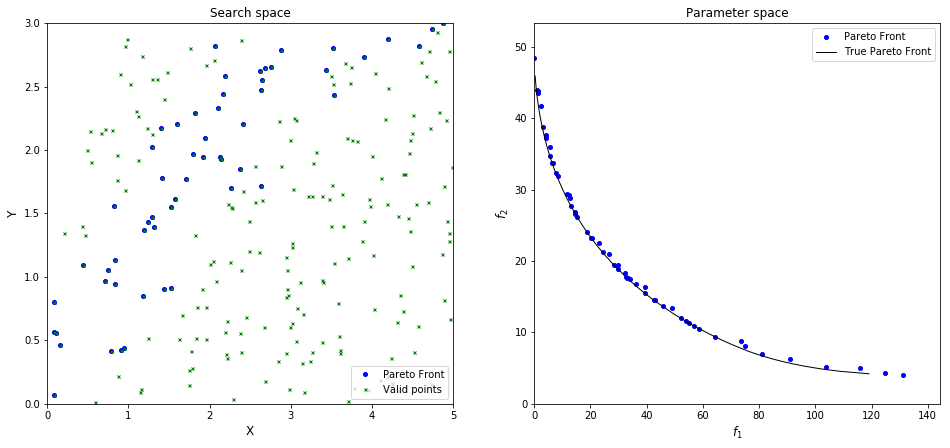

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))

# search space
ax1.plot(PF[:,2], PF[:,3],'b.', markersize=8, label='Pareto Front')
ax1.plot(valid_x,valid_y,'gx', markersize=3, label='Valid points')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_xlim([x_low, x_high])
ax1.set_ylim([y_low, y_high])
ax1.set_title('Search space')
ax1.legend(loc='lower right')

# parameter space
ax2.plot(PF[:,0], PF[:,1],'b.', markersize=8, label='Pareto Front')
ax2.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
ax2.set_xlabel('$f_1$', fontsize=12)
ax2.set_ylabel('$f_2$', fontsize=12)
ax2.set_xlim([0, 1.1*max(all_values[:,0])])
ax2.set_ylim([0, 1.1*max(all_values[:,1])])
ax2.set_title('Parameter space')
ax2.legend()

Let's define a function for a full evaluation of a multiobjective optimization case with Monte Carlo approach. 

In [20]:
def MC(noPoints):
    '''Apply the Monte Carlo optimization approach to a multiobjective optimization process
    
    INPUTS
    noPoints: number of points for the random distribution
    (other elements are required, such as the functions, constraints, bounds...)

    OUTPUTS:
    PF: array with the search and parameters space points of every solution in the Pareto front
    MC_eval: number of function evaluations
    '''
    
    # get a random set of points
    x = x_low+np.random.rand(noPoints)*(x_high-x_low)
    y = y_low+np.random.rand(noPoints)*(y_high-y_low)
    
    # make a copy of the points X-Y to extract the valid ones
    valid_x = np.copy(x)
    valid_y = np.copy(y)
    
    # get the points that are valid under the constraints
    boolMat = np.zeros((noPoints))
    
    # while there are constrained points, randomly generate new points
    while sum(boolMat) != 0:
        for i in range(len(constVal)):
            if compMode[i] == 'leq':
                boolMat = np.logical_or(const(valid_x, valid_y, i) < constVal[i], const(valid_x, valid_y, i) == constVal[i])
            elif compMode[i] == 'less':
                boolMat = const(valid_x, valid_y, i) < constVal[i]
            elif compMode[i] == 'geq':
                boolMat = np.logical_or(const(valid_x, valid_y, i) > constVal[i], const(valid_x, valid_y, i) == constVal[i])
            elif compMode[i] == 'greater':
                boolMat = const(valid_x, valid_y, i) > constVal[i]
            elif compMode[i] == 'eq':
                boolMat = const(valid_x, valid_y, i) == constVal[i]
            else:
                print('Bad comparison mode matrix')
            valid_x[np.logical_not(boolMat)] = x_low+np.random.rand(noPoints)*(x_high-x_low)
            valid_y[np.logical_not(boolMat)] = y_low+np.random.rand(noPoints)*(y_high-y_low)
    
    # if dimensions don't match, raise an error
    if len(valid_x) != len(valid_y):
        raise ValueError("\x1b[31mError in dimensions\x1b[0m")
        
    # evaluate the function for the valid ones
    valid_values = np.zeros([len(valid_x), funNo])
    
    # define the function attribute counter
    fun.counter = 0
    
    # evaluate all functions for the valid points
    for i in range(funNo):
        valid_values[:,i] = fun(valid_x, valid_y, i)
    
    # true number of calllings to the function
    MC_eval = fun.counter
    
    # compute the ParetoFront array
    PF = skyline(np.array([valid_x, valid_y]).T, valid_values)
    
    # return the ParetoFront array and the number of evaluations
    return PF, MC_eval

# 3. Genetic algorithm approach
The limit of the genetic algorithm can't be an error limit or tolerance - given that the Pareto front doesn't have an empirical expression or something to relate the value to. Instead a limit in the number of generations will be used. Let's assume that with an infinite number of generations, the exact Pareto front will be exactly determined and defined with all its characteristics. In order to compare the results with the previous Monte Carlo approach with 500 points (i.e. 500 evaluations), the values used for the GA will try to have less evaluations that for MC.

## 3.1 Initial setup and GA configuration

In [21]:
# number of points for each generation
noGApoints = 50

# limit of generations
genLim = 10

# get the generation matrix and the initial generation from random points 
generation = np.zeros([genLim, noGApoints, 2])
generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)

In [22]:
# preallocation of other arrays

# ideally a Pareto front will have as many elements as generation individuals 
paretoFront = np.zeros([genLim, noGApoints, funNo+2]) 
# array to store the functions evaluations
funEval = np.zeros([genLim, noGApoints, funNo])
# fitness value array [simple probabilty, cummuative normalized probability]
fitness = np.zeros([genLim, noGApoints, 2]) 

In [23]:
def constrainedPts(points, const, constVal, compMode):
    # checks if any of the points is constrained and returns its boolean

    # preallocate space for the boolean matrix
    boolMat = np.zeros([len(constVal), points.shape[0]])
    
    # get the points that are valid under the constraints
    for i in range(len(constVal)):
        if compMode[i] == 'leq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) < constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'less':
            boolMat[i,:] = const(points[:,0], points[:,1], i) < constVal[i]
        elif compMode[i] == 'geq':
            boolMat[i,:] = np.logical_or(const(points[:,0], points[:,1], i) > constVal[i], const(points[:,0], points[:,1], i) == constVal[i])
        elif compMode[i] == 'greater':
            boolMat[i,:] = const(points[:,0], points[:,1], i) > constVal[i]
        elif compMode[i] == 'eq':
            boolMat[i,:] = const(points[:,0], points[:,1], i) == constVal[i]
        else:
            raise RuntimeError('Bad comparison mode matrix')
            
    # once all the comparisons are made, the output should be an OR array along the boolMat
    return np.logical_or.reduce(np.logical_not(boolMat))

In [24]:
# while there are values out of bounds they will be replaced to get only possible values
while sum(constrainedPts(generation[0,:,:], const, constVal, compMode)) != 0:
    # call the function to return the boolean matrix
    boolMat = constrainedPts(generation[0,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    # randomly get new points
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    # relocate the new points
    generation[0, boolMat] = nonConstPts

In [25]:
# evaluate all the functions
for i in range(funNo):
    funEval[0,:,i] = fun(generation[0,:,0], generation[0,:,1], i)

In [26]:
# get the result of the skyline operator in a temporal array
paretoFront_temp = skyline(generation[0,:,:], funEval[0,:,:])
# due to possible size incompatibilities, store the temporal Pareto front in the final array
paretoFront[0,0:paretoFront_temp.shape[0],:] = paretoFront_temp

## 3.2 Fitness of the individuals. Selection, reproduction, and mutation
The Pareto front was determined before, so points belonging to the Pareto front will have the greatest fitness. The fitness will be assigned to the other points in two different phases:
* The first fitness will be the minimum distance from each one of the points to the closest point of the Pareto front. Thus, the points of the Pareto front will have a distance of zero. The values are normalized with the maximum distance of all points, having distances inside the range $\in (0,1)$. These values are substracted from one, having that the range is still $\in (0,1)$ but the fitness is reverted, having that Pareto front points will have a value of $1$ (higher fitness) and the the dominated points will have a value between $0$ and $0.99$.
* Once the distances are normalized and sorted, the cummulative probability of the total sum is computed, having a vector that goes from 0 to 1 with the probability of each point represented (the selection method chosen is the roulette method, having a probability of being chosen according to the fitness).

In [27]:
# compute the distance from every point to the Pareto front
for i in range(noGApoints):
    dist = np.min(np.sqrt((funEval[0,i,0] - paretoFront_temp[:,0])**2+(funEval[0,i,1] - paretoFront_temp[:,1])**2))
    fitness[0,i,0] = np.min(dist)

# normalize that distance and correcto for (1,0) range
fitness[0,:,0] = 1-fitness[0,:,0]/np.max(fitness[0,:,0])
# compute the cummulative probability
fitness[0,:,1] = np.cumsum(fitness[0,:,0]/sum(fitness[0,:,0])) 

For the Pareto front points, (i.e., fitness = $1$), the new generation point will be computed with the previous generation point and a random mutation to increase variability. The points that are not in the Pareto front will be selected and combined so new generation points tend to go towards the Pareto front. Mutations will be also included in points that don't belong to the Pareto front. 

In [28]:
# rate of mutation
mutationProb = 0.05

In [29]:
# loop over all points
for i in range(noGApoints):
    # if the fitness is equal to one
    if fitness[0,i,0] == 1:
        # points in the new generation will be the ones in the previous ones with mutations
        generation[1,i,0] = generation[0,i,0]+generation[0,i,0]*np.random.normal(0.0,mutationProb)
        generation[1,i,1] = generation[0,i,1]+generation[0,i,1]*np.random.normal(0.0,mutationProb)
    # if fitness is not one
    else:
        # use the cummulative probability to select a random parent
        dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        # avoid possible self-crossover
        while dadPos == mumPos:
            dadPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
            mumPos = np.argmax(fitness[0,:,1]>np.random.rand())-1
        # get the values of both parents
        dad = generation[0,dadPos,:]
        mum = generation[0,mumPos,:]
        # combine the parents with an average
        generation[1,i,0] = (dad[0]+mum[0])/2
        generation[1,i,1] = (dad[1]+mum[1])/2
        # mutate the parents
        generation[1,i,0] = generation[1,i,0] + generation[1,i,0]*np.random.normal(0.0,mutationProb)
        generation[1,i,1] = generation[1,i,1] + generation[1,i,1]*np.random.normal(0.0,mutationProb) 

In [30]:
# while there are values out of bounds they will be replaced to get only possible values
while sum(constrainedPts(generation[1,:,:], const, constVal, compMode)) != 0:
    # call the function to return the boolean matrix
    boolMat = constrainedPts(generation[1,:,:], const, constVal, compMode)
    nonValidPts = sum(boolMat)
    nonConstPts = np.zeros([nonValidPts, 2])
    # randomly get new points
    nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
    nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
    # relocate the new points
    generation[1, boolMat] = nonConstPts

In [31]:
# evaluate all the functions
for i in range(funNo):
    funEval[1,:,i] = fun(generation[1,:,0], generation[1,:,1], i)

In [32]:
# get the result of the skyline operator in a temporal array
paretoFront_temp = skyline(generation[1,:,:], funEval[1,:,:])
# due to possible size incompatibilities, store the temporal Pareto front in the final array
paretoFront[1,0:paretoFront_temp.shape[0],:] = paretoFront_temp

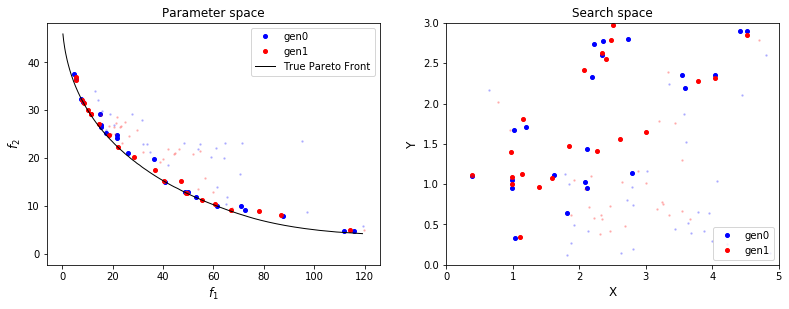

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))

# parameter space
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'b.', markersize=8, label='gen0')
ax1.plot(paretoFront[1,:,0], paretoFront[1,:,1],'r.', markersize=8, label='gen1')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'b.', markersize=3, alpha=0.2)
ax1.plot(funEval[1,:,0],funEval[1,:,1],'r.', markersize=3, alpha=0.2)
# show the (sorted) true Pareto front connected with a line  
ax1.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
# hide the zero points associated with preallocation
ax1.plot([0], [0], 's',c='white', markersize=8)
ax1.set_xlabel('$f_1$', fontsize=12)
ax1.set_ylabel('$f_2$', fontsize=12)
ax1.set_title('Parameter space')
ax1.legend()

# seach space
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'b.', markersize=8, label='gen0')
ax2.plot(paretoFront[1,:,2], paretoFront[1,:,3],'r.', markersize=8, label='gen1')
ax2.plot(generation[0,:,0],generation[0,:,1],'b.', markersize=3, alpha=0.2)
ax2.plot(generation[1,:,0],generation[1,:,1],'r.', markersize=3, alpha=0.2)
# hide the zero points associated with preallocation
ax2.plot([0], [0], 's',c='white', markersize=8)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Search space')
ax2.legend(loc='lower right')

## 3.3 Evolution of the generations. Genetic algorithm function
Once the generation zero has been generated and the first one has been computed, let's construct a funtion for executing the whole algorithm.

In [34]:
def GA_multiobjective(noGApoints, genLim):
    '''Apply this custom gentic algorithm to a multiobjective optimization problem
    
    INPUTS
    noPoints: number of points for each generation
    genLim: number of generations
    (other elements are required, such as the functions, constraints, bounds...)

    OUTPUTS:
    generation: search space values for all individuals in all generations
    paretoFront: array with the search and parameters space values of every Pareto front point
    funEval: parameter space values for all individuals in all generations
    fun.counter: number of function evaluations
    '''
    
    # function attribute to count callings (future CFD simulations)
    fun.counter = 0
    
    # get the generation matrix and the initial generation from random points 
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)

    # preallocation of other arrays
    # ideally a Pareto front will have as many elements as generation individuals 
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) 
    # array to store the functions evaluations
    funEval = np.zeros([genLim-1, noGApoints, funNo])
    # fitness value array [simple probabilty, cummuative normalized probability]
    fitness = np.zeros([genLim-1, noGApoints, 2]) 
    
    # loop over all generations
    for j in range(genLim-1):  
        # while there are values out of bounds they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            # call the function to return the boolean matrix
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            # randomly get new points
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            # relocate the new points
            generation[j, boolMat] = nonConstPts

        # function evaluation
        for i in range(funNo):
            funEval[j,:,i] = fun(generation[j,:,0], generation[j,:,1], i)
        
        # Pareto front determination
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp

        # fitness computation
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2)) 
            fitness[j,i,0] = np.min(dist)
        
        # compute the fitness with the normalized distances calculated above
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        
        # looping the whole generation
        for i in range(noGApoints):
            # if the firness is equal to one (i.e. point belong to PF) it will be slightly perturbed
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]+generation[j,i,0]*np.random.normal(0.0,mutationProb)
                generation[j+1,i,1] = generation[j,i,1]+generation[j,i,1]*np.random.normal(0.0,mutationProb)
            # otherwise, another point will be calculated 
            else:
                # get a random individual from the generation (higher fitness will have greater possibilities to get choosed)
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                # if they are the same, to promote variation, they are randomly picked again
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                # get the value of the two parents in the current generation
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                # assign the value of the mean between the two individuals
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                #slightly mutate the new individuals
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,mutationProb)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,mutationProb)
                
    # return the desired outputs
    return generation, paretoFront, funEval, fitness, fun.counter

In [35]:
# define the number of points per generation
noGApoints = 50
# define the limit in generations
genLim = 4
# sample calling to the function
generation, paretoFront, funEval, fitness, GA_eval = GA_multiobjective(noGApoints, genLim)

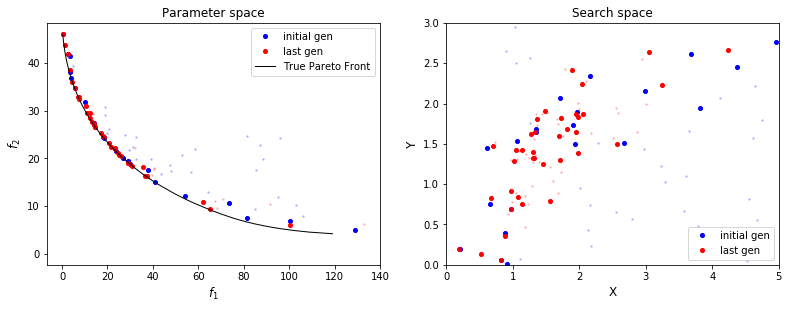

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((max(all_values[:,0])-min(all_values[:,0]))/10, (max(all_values[:,1])-min(all_values[:,1]))/10))

# parameter space
ax1.plot(paretoFront[0,:,0], paretoFront[0,:,1],'b.', markersize=8, label='initial gen')
ax1.plot(paretoFront[-1,:,0], paretoFront[-1,:,1],'r.', markersize=8, label='last gen')
ax1.plot(funEval[0,:,0],funEval[0,:,1],'b.', markersize=3, alpha=0.2)
ax1.plot(funEval[-1,:,0],funEval[-1,:,1],'r.', markersize=3, alpha=0.2)
# show the (sorted) true Pareto front connected with a line  
ax1.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
# hide the zero points associated with preallocation
ax1.plot([0], [0], 's',c='white', markersize=8)
ax1.set_xlabel('$f_1$', fontsize=12)
ax1.set_ylabel('$f_2$', fontsize=12)
ax1.set_title('Parameter space')
ax1.legend()

# seach space
ax2.plot(paretoFront[0,:,2], paretoFront[0,:,3],'b.', markersize=8, label='initial gen')
ax2.plot(paretoFront[-1,:,2], paretoFront[-1,:,3],'r.', markersize=8, label='last gen')
ax2.plot(generation[0,:,0],generation[0,:,1],'b.', markersize=3, alpha=0.2)
ax2.plot(generation[-1,:,0],generation[-1,:,1],'r.', markersize=3, alpha=0.2)
# hide the zero points associated with preallocation
ax2.plot([0], [0], 's',c='white', markersize=8)
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_xlim([x_low, x_high])
ax2.set_ylim([y_low, y_high])
ax2.set_title('Search space')
ax2.legend(loc='lower right')

In [37]:
# apply the skyline operator to all the points in the GA output
PFf1 = (paretoFront[paretoFront[:,:,0] != 0])[:,0]
PFf2 = (paretoFront[paretoFront[:,:,0] != 0])[:,1]
PFx = (paretoFront[paretoFront[:,:,0] != 0])[:,2]
PFy = (paretoFront[paretoFront[:,:,0] != 0])[:,3]
   
# get a through generation Pareto front
PF_GA = skyline(np.array([PFx,PFy]).T,np.array([PFf1,PFf2]).T)

It can be seen that with less evaluations than for the Monte Carlo approach, the genetic algorithm method gives results accurate enough that follow the trend of the system that it is being analyzed (withouth that many iterations).

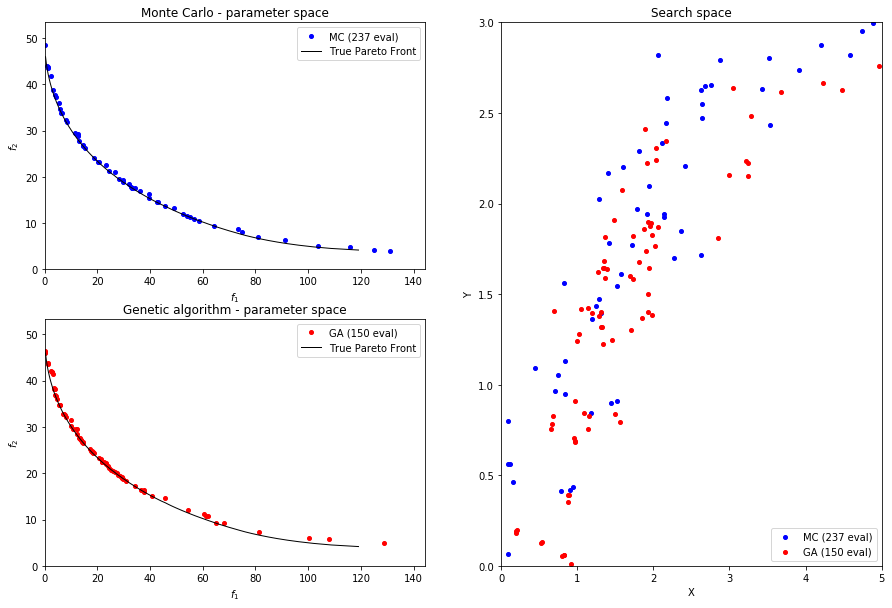

In [38]:
# figure and axes creation
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
axMC = fig.add_subplot(grid[0,0])
axGA = fig.add_subplot(grid[1, 0])
axPts = fig.add_subplot(grid[0:, 1:])

# Monte Carlo results
axMC.plot(PF[:,0], PF[:,1],'.',c='b', markersize=8, label='MC (%i eval)' %MC_eval)
axMC.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axMC.set_xlabel('$f_1$')
axMC.set_ylabel('$f_2$')
axMC.set_xlim([0, 1.1*max(all_values[:,0])])
axMC.set_ylim([0, 1.1*max(all_values[:,1])])
axMC.set_title('Monte Carlo - parameter space')
axMC.legend()

# genetic algorithm results
axGA.plot(PF_GA[:,0], PF_GA[:,1],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axGA.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGA.set_xlabel('$f_1$')
axGA.set_ylabel('$f_2$')
axGA.set_xlim([0, 1.1*max(all_values[:,0])])
axGA.set_ylim([0, 1.1*max(all_values[:,1])])
axGA.set_title('Genetic algorithm - parameter space')
axGA.legend()

# search space with both methods
axPts.plot(PF[:,2], PF[:,3],'.',c='b', markersize=8, label='MC (%i eval)' %MC_eval)
axPts.plot(PF_GA[:,2], PF_GA[:,3],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axPts.set_xlabel('X')
axPts.set_ylabel('Y')
axPts.set_xlim([x_low, x_high])
axPts.set_ylim([y_low, y_high])
axPts.set_title('Search space')
axPts.legend(loc='lower right')

# 4. Genetic algorithm attemp ** with elitism ** in individuals selection

In [39]:
def GA_multiobjective_elitism(noGApoints, genLim):
    '''Apply this custom gentic algorithm w/ elitism to a multiobjective optimization problem
    
    INPUTS
    noPoints: number of points for each generation
    genLim: number of generations
    (other elements are required, such as the functions, constraints, bounds...)

    OUTPUTS:
    generation: search space values for all individuals in all generations
    paretoFront: array with the search and parameters space values of every Pareto front point
    funEval: parameter space values for all individuals in all generations
    fun.counter: number of function evaluations
    '''
    
    # function attribute to count callings (future CFD simulations)
    fun.counter = 0
    
    # get the generation matrix and the initial generation from random points 
    generation = np.zeros([genLim, noGApoints, 2])
    generation[0,:,0] = x_low+np.random.rand(noGApoints)*(x_high-x_low)
    generation[0,:,1] = y_low+np.random.rand(noGApoints)*(y_high-y_low)

    # preallocation of other arrays
    # ideally a Pareto front will have as many elements as generation individuals 
    paretoFront = np.zeros([genLim-1, noGApoints, funNo+2]) 
    # array to store the functions evaluations
    funEval = np.zeros([genLim-1, noGApoints, funNo])
    # fitness value array [simple probabilty, cummuative normalized probability]
    fitness = np.zeros([genLim-1, noGApoints, 2])
    # list to save the individuals of each generation that are kept in the elitist list
    elitism = np.ones([genLim, noGApoints])
                
    # loop over all generations
    for j in range(genLim-1):  
        # while there are values out of bounds they will be replaced to get only possible values
        while sum(constrainedPts(generation[j,:,:], const, constVal, compMode)) != 0:
            # call the function to return the boolean matrix
            boolMat = constrainedPts(generation[j,:,:], const, constVal, compMode)
            nonValidPts = sum(boolMat)
            nonConstPts = np.zeros([nonValidPts, 2])
            # randomly get new points
            nonConstPts[:,0] = x_low+np.random.rand(nonValidPts)*(x_high-x_low)
            nonConstPts[:,1] = y_low+np.random.rand(nonValidPts)*(y_high-y_low)
            # relocate the new points
            generation[j, boolMat] = nonConstPts

        # function evaluation
        for i in range(funNo):
            # to compute only the non-elitist individuals, a for-loop will be used instead of vectorization
            for k in range(noGApoints):
                # in the individual is not elitist, recompute it
                if elitism[j,k] == 1:
                    # temporarily store the variables (in arrays to keep the count of the function evaluations)
                    variable1 = np.array([generation[j,k,0]])
                    variable2 = np.array([generation[j,k,1]])
                    # evaluate the individual
                    funEval[j,k,i] = fun(variable1, variable2, i)
                # if it is an elitist individual
                else:
                    # the value is taken from the previous generation
                    funEval[j,k,i] = funEval[j-1,k,i]
        
        # Pareto front determination
        paretoFront_temp = skyline(generation[j,:,:], funEval[j,:,:])
        paretoFront[j,0:paretoFront_temp.shape[0],:] = paretoFront_temp

        # fitness computation
        for i in range(noGApoints):
            dist = np.min(np.sqrt((funEval[j,i,0] - paretoFront_temp[:,0])**2+(funEval[j,i,1] - paretoFront_temp[:,1])**2)) 
            fitness[j,i,0] = np.min(dist)
        
        # compute the fitness with the normalized distances calculated above
        fitness[j,:,0] = 1-fitness[j,:,0]/np.max(fitness[j,:,0]) #simple probability
        fitness[j,:,1] = np.cumsum(fitness[j,:,0]/sum(fitness[j,:,0])) #cummulative probability
        
        # looping the whole generation
        for i in range(noGApoints):
            # if the firness is equal to one (i.e. point belong to PF) it will be slightly perturbed
            if fitness[j,i,0] == 1:
                generation[j+1,i,0] = generation[j,i,0]
                generation[j+1,i,1] = generation[j,i,1]
                # save the index to the list to avoid recomputing it
                elitism[j+1,i] = 0
                
            # otherwise, another point will be calculated 
            else:
                # get a random individual from the generation (higher fitness will have greater possibilities to get choosed)
                dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                # if they are the same, to promote variation, they are randomly picked again
                while dadPos == mumPos:
                    dadPos = np.argmax(fitness[j,:,1]>np.random.rand())
                    mumPos = np.argmax(fitness[j,:,1]>np.random.rand())
                # get the value of the two parents in the current generation
                dad = generation[j,dadPos,:]
                mum = generation[j,mumPos,:]
                # assign the value of the mean between the two individuals
                generation[j+1,i,0] = (dad[0]+mum[0])/2
                generation[j+1,i,1] = (dad[1]+mum[1])/2
                #slightly mutate the new individuals
                generation[j+1,i,0] = generation[j+1,i,0] + generation[j+1,i,0]*np.random.normal(0.0,2*mutationProb)
                generation[j+1,i,1] = generation[j+1,i,1] + generation[j+1,i,1]*np.random.normal(0.0,2+mutationProb)
                
    # return the desired outputs
    return generation, paretoFront, funEval, fitness, fun.counter

In [40]:
# sample calling to the function with the same parameters as the one without elitism
generationE, paretoFrontE, funEvalE, fitnessE, GA_evalE = GA_multiobjective_elitism(noGApoints, genLim)

In [41]:
# count the points that are there in the Pareto front
paretoGAno = sum(paretoFront[-1,:,0] != 0)
paretoGAEno = sum(paretoFrontE[-1,:,0] != 0)

# reshape the matrix to have a nice (nx4) array
paretoGA = paretoFront[-1,paretoFront[-1,:,:] != 0].reshape((paretoGAno, 4))
paretoGAE = paretoFrontE[-1,paretoFrontE[-1,:,:] != 0].reshape((paretoGAEno, 4))

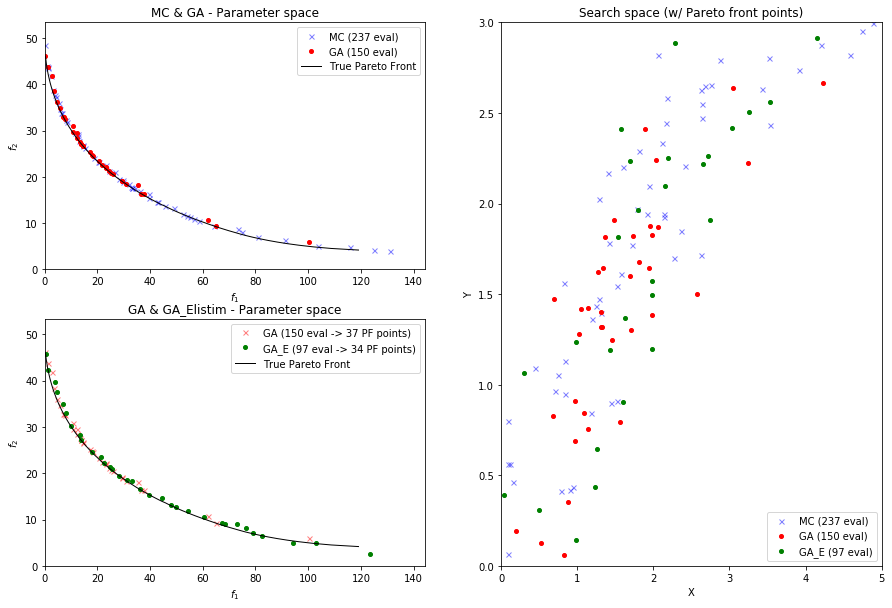

In [42]:
# figure and axes creation
fig = plt.figure(figsize=(15, 10))
grid = plt.GridSpec(2, 2, wspace=0.2, hspace=0.2)
axGA = fig.add_subplot(grid[0, 0])
axGAE = fig.add_subplot(grid[1,0])
axPts = fig.add_subplot(grid[0:, 1:])

# parameter space comparison between Monte Carlo and plain genetic algorithm
axGA.plot(PF[:,0], PF[:,1],'x',c='b', markersize=5, alpha=0.5, label='MC (%i eval)' %MC_eval)
axGA.plot(paretoGA[:,0], paretoGA[:,1],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axGA.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGA.set_xlabel('$f_1$')
axGA.set_ylabel('$f_2$')
axGA.set_xlim([0, 1.1*max(all_values[:,0])])
axGA.set_ylim([0, 1.1*max(all_values[:,1])])
axGA.set_title('MC & GA - Parameter space')
axGA.legend()

# parameter space comparison between plain genetic algorithm and genetic algorithm with elitism
axGAE.plot(paretoGA[:,0], paretoGA[:,1],'x',c='r', markersize=5, alpha=0.5, label='GA (%i eval -> %i PF points)' %(GA_eval, paretoGAno))
axGAE.plot(paretoGAE[:,0], paretoGAE[:,1],'.',c='g', markersize=8, label='GA_E (%i eval -> %i PF points)' %(GA_evalE, paretoGAEno))
axGAE.plot(TPF[np.argsort(TPF[:,0]),0],TPF[np.argsort(TPF[:,0]),1], 'k', linewidth=1,label='True Pareto Front')
axGAE.set_xlabel('$f_1$')
axGAE.set_ylabel('$f_2$')
axGAE.set_xlim([0, 1.1*max(all_values[:,0])])
axGAE.set_ylim([0, 1.1*max(all_values[:,1])])
axGAE.set_title('GA & GA_Elistim - Parameter space')
axGAE.legend()

# search space
axPts.plot(PF[:,2], PF[:,3],'x',c='b', markersize=5, alpha=0.5, label='MC (%i eval)' %MC_eval)
axPts.plot(paretoGA[:,2], paretoGA[:,3],'.',c='r', markersize=8, label='GA (%i eval)' %GA_eval)
axPts.plot(paretoGAE[:,2], paretoGAE[:,3],'.',c='g', markersize=8, label='GA_E (%i eval)' %GA_evalE)
axPts.set_xlabel('X')
axPts.set_ylabel('Y')
axPts.set_xlim([x_low, x_high])
axPts.set_ylim([y_low, y_high])
axPts.set_title('Search space (w/ Pareto front points)')
axPts.legend(loc='lower right')

As it can be seen, the use of elitism will reduce the number of evaluations even further, although the number in the Pareto front may be affected. This will be relevant when using CFD, because each evaluation may take several minutes or hours. However, this code for a multiobjective optimization problem is not the best one - there are algorithms proved to find accurate solutions in a considerable low amount number of evaluations. 